# Segmentation Practical
by Dominic Waithe (2019)

In [105]:
#Library imports for this notebook. Please remember to run before any other cells.
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import data, img_as_float,color, img_as_ubyte
from skimage import color, io
from skimage.feature import peak_local_max, canny
from skimage.transform import hough_circle,hough_circle_peaks,hough_line, hough_line_peaks
from skimage.draw import circle_perimeter
from skimage.filters import threshold_isodata
from skimage.morphology import watershed, skeletonize
from skimage.segmentation import chan_vese, felzenszwalb, slic, quickshift, watershed,mark_boundaries
from skimage.filters import try_all_threshold, threshold_otsu
from matplotlib import cm


## Simple global thresholding methods


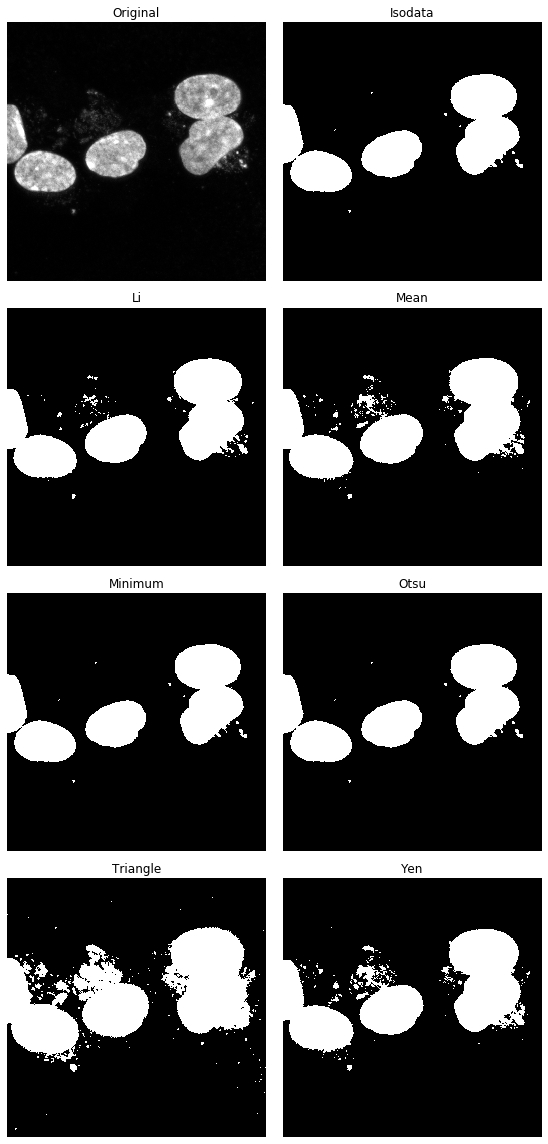

In [190]:

img = io.imread('MAX_BRCA1 C20 SCBT 50 and TBK1 A6 SCBT 100 ivt 4.tif')
img = img_as_float(img)
img_ch0 = img[:,:,0]
img_ch1 = img[:,:,1]
img_ch2 = img[:,:,2]

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img_ch0, figsize=(8, 16), verbose=False)
plt.show()

## Otsu segmentation and histogram visualisation


thresh 0.3593252889677272


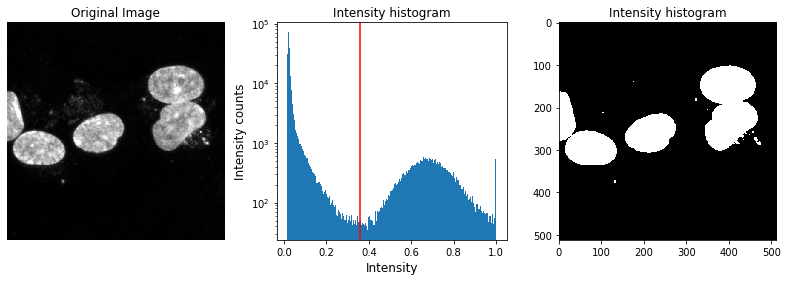

In [187]:
thresh = threshold_otsu(img_ch0)
binary = img_ch0 > thresh
fig, axes = plt.subplots(1,3, figsize=(14, 4))
ax = axes.flatten()

ax[0].imshow(img_ch0, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)
ax[1].hist(img_ch0.reshape(-1),bins=256)
ax[1].set_yscale("log")
ax[1].axvline(thresh, color='r')
ax[1].set_title("Intensity histogram", fontsize=12)
ax[1].set_ylabel("Intensity counts", fontsize=12)
ax[1].set_xlabel("Intensity", fontsize=12)
ax[2].imshow(binary, cmap="gray")
ax[2].set_title("Intensity histogram", fontsize=12)
print('thresh',thresh)

In [ ]:
#From your knowledge of image acquisition what do you notice about this histogram which suggests the image is not optimum.

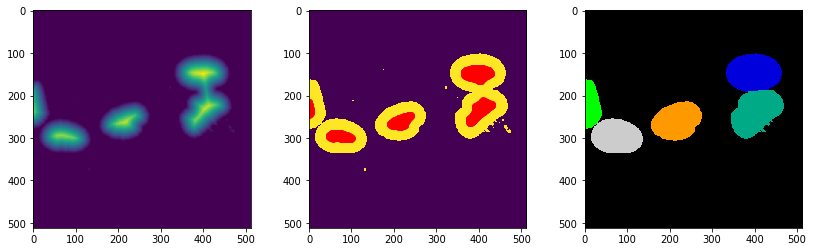

In [394]:

# Now we want to separate the two objects in image
# Apply a distance transform to the image.
distance = ndi.distance_transform_edt(binary)

#There are different ways of setting your seed points for the watershed. This is one way:
local_maxi = np.copy(distance) #We make a copy of our image so as not to destroy the original.
local_maxi = local_maxi>(np.max(local_maxi)*0.7) #We take a threshold based on the size of the objects. The middle 30% remains as a seed for each region.


coordinates = np.where(local_maxi)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=binary)#Now we run the watershed algorithm and connect the cells to each seed point.

fig, ax = plt.subplots(1,3, figsize=(14, 4))
ax[0].imshow(distance)
ax[1].plot(coordinates[1],coordinates[0],'ro')
ax[1].imshow(binary)
ax[2].imshow(labels,cmap=plt.cm.nipy_spectral)#The different colours represent the different cells.

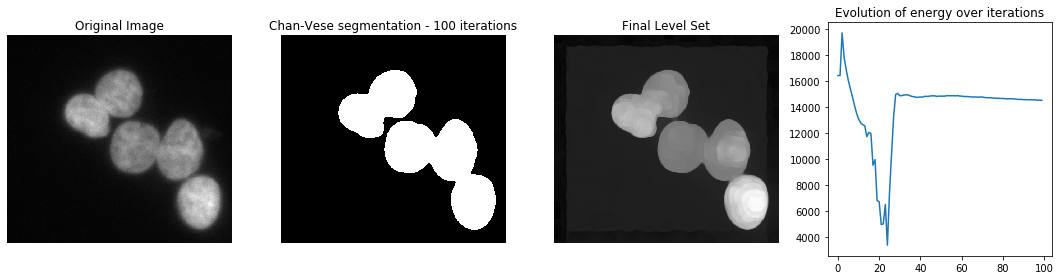

In [399]:
img = io.imread('HeLa_SNAP_ATRX16_BrdU_neg_UVC_30min_ATRX_green_yH2AX_red_01_03_R3D-1.tif')
img = img_as_float(img)
img = img/np.max(img)


cv = chan_vese(img, mu=0.1, lambda1=1.0, lambda2=1.0, tol=1e-3, max_iter=100, dt=1.0, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(1,4, figsize=(15, 4))
ax = axes.flatten()

ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

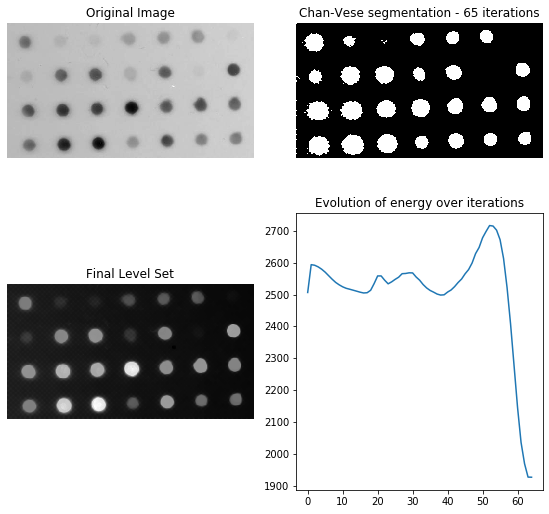

In [290]:


img = io.imread('Dot_Blot.jpg')
image = img_as_float(img)


# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.06, lambda1=1.3, lambda2=1.5, tol=1e-3, max_iter=65, dt=0.6, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

563.0

Text(0.5, 1.0, 'Slic segments')

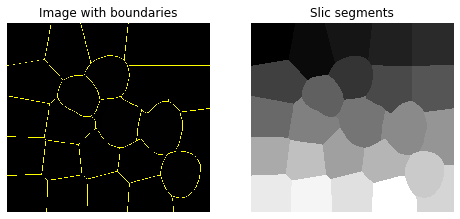

In [341]:
image = io.imread('HeLa_SNAP_ATRX16_BrdU_neg_UVC_30min_ATRX_green_yH2AX_red_01_03_R3D-1.tif')
img = img_as_float(image)


segments_slic = slic(img, n_segments=25, compactness=0.005, sigma=3)

mb = mark_boundaries(image, segments_slic)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.flatten()



ax[0].imshow(mb)
ax[0].set_axis_off()
ax[0].set_title("Image with boundaries", fontsize=12)

ax[1].imshow(segments_slic, cmap="gray")
ax[1].set_axis_off()
title = "Slic segments"
ax[1].set_title(title, fontsize=12)




In [4]:
img = io.imread('MAX_BRCA1 C20 SCBT 50 and TBK1 A6 SCBT 100 ivt 4.tif')
img = img_as_float(img)

In [5]:
print(img.shape)

(512, 512, 3)


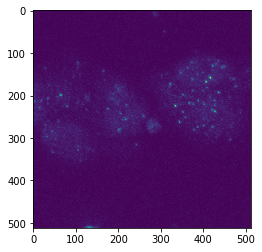

In [116]:
img_ch0 = img[:,:,0]
img_ch1 = img[:,:,1]
img_ch2 = img[:,:,2]
plt.imshow(img_ch1)

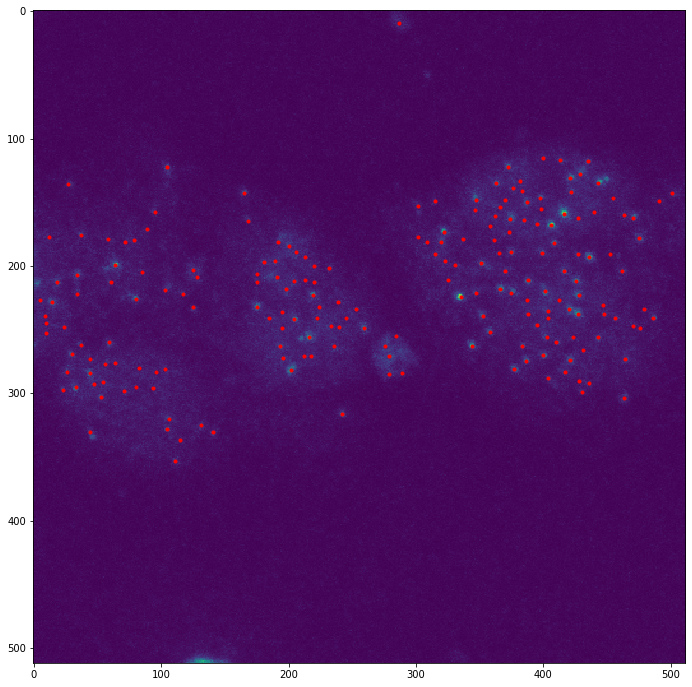

In [26]:
plt.figure(figsize=(12,12))
image_max = ndi.maximum_filter(img_ch1, size=5, mode='constant')
# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(img_ch1, min_distance=5)
THR = np.mean(img_ch1)+(np.std(img_ch1)*3.)
coordinates = coordinates[img_ch1[coordinates[:,0],coordinates[:,1]]>THR,:]
plt.imshow(img_ch1)
plt.plot(coordinates[:, 1], coordinates[:, 0], 'r.')

In [27]:
#OPTIONAL
#The above is a very basic maxima finding algorithm. A more advanced variant is the Fiji/ImageJ maxima.
#The following is a Python implementation of the same algorithm.
#https://github.com/dwaithe/generalMacros/blob/master/maximaFinding/find%20Maxima.ipynb
#Try this algorithm on the same image file and compare the results.

# The Hough Circle Transform

### Using the Hough Circle transform to segment Giant Plasma Membrane Vesicles (GPMVs) 

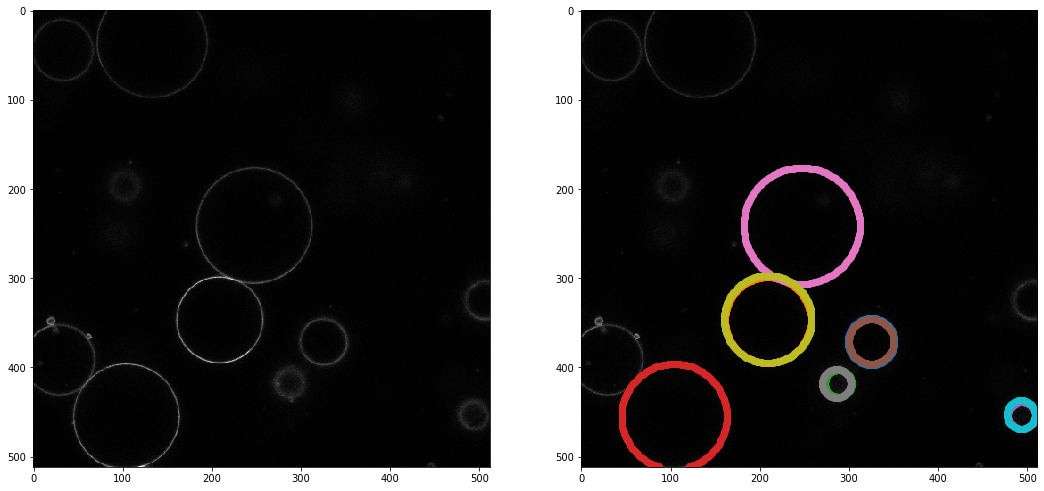

In [284]:


# Load picture, convert to grayscale and detect edges
img = io.imread('MAX_2phase.tif')
edges = img_as_float(img)
thresh = threshold_otsu(edges)
binary = edges > thresh

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
hough_radii = np.arange(15, 100, 1)
hough_res = hough_circle(binary, hough_radii)

# Select the most prominent circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=10)


# Draw them
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 24))
image = color.gray2rgb(edges)
ax[0].imshow(image, cmap=plt.cm.gray)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    ax[1].plot(circx, circy,'o')
ax[1].imshow(image,)
plt.show()

In [285]:
#Advanced Optional TODO:
#In the above example the hough circle algorithm finds multiple circles for the same GPMV. 
#Can you devise a mechansim to only provide one circle for each GPMV.
#Can you devise a method to plot the intensity around the circle.

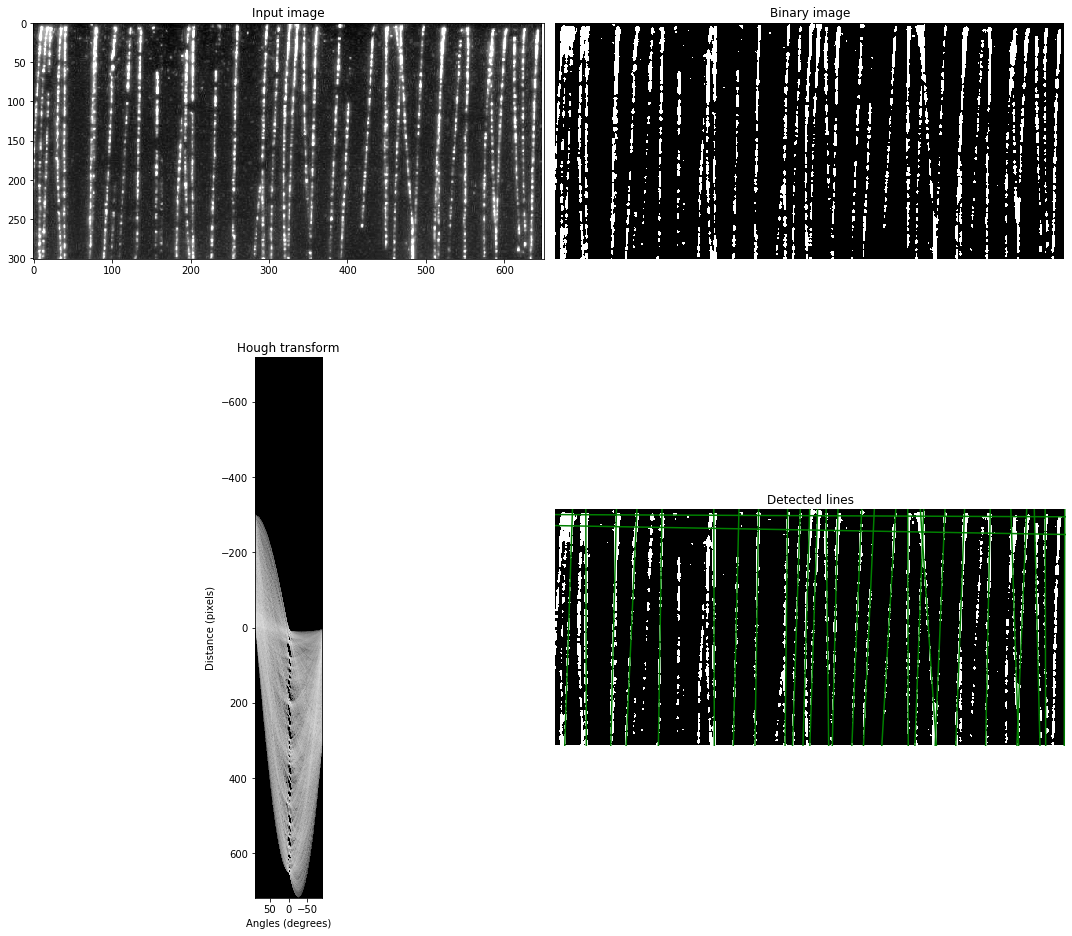

In [183]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.morphology import binary_dilation, binary_erosion
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#Image Citation: Payne AC, Andregg M, Kemmish K, Hamalainen M, Bowell C, et al. (2013) 
#Molecular Threading: Mechanical Extraction, Stretching and Placement of DNA Molecules 
#from a Liquid-Air Interface. PLoS ONE 8(7): e69058. doi:10.1371/journal.pone.0069058


# Import image.
image = io.imread('DNA_stretched.tif')
edges = img_as_float(image)
thresh = threshold_otsu(edges)
binary = edges > thresh

#binary = binary_dilation(binary)
#binary = binary_erosion(binary)
minimum_len = 5 #Minimum length of segments to retain.



# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 720)
h, theta, d = hough_line(binary, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
ax = axes.ravel()
ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[1].imshow(binary, cmap=cm.gray)
ax[1].set_title('Binary image')
ax[1].set_axis_off()

ax[2].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
ax[2].set_title('Hough transform')
ax[2].set_xlabel('Angles (degrees)')
ax[2].set_ylabel('Distance (pixels)')
ax[2].axis('image')
ax[3].imshow(binary, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    
    x = np.arange(origin[0],origin[1],1)
    yb = np.interp(x, origin, [y0,y1], left=None, right=None, period=None)
    ax[3].plot((origin),(y0,y1), '-g')
    
    i0,j0,i1,j1 = None,None,None,None
    img_out[np.clip(yb.astype(np.int),0,img_out.shape[0]-1),np.clip(x.astype(np.int),0,img_out.shape[1]-1)] =1
    
    
    
    
    
ax[3].set_xlim(origin)
ax[3].set_ylim((binary.shape[0], 0))
ax[3].set_axis_off()
ax[3].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [ ]:
#Advanced Optional TODO:
#Can you plot the intensities of a few of the DNA molecules along the lines.
#In the above example some of the hough lines span across the image.
#How could you refine these lines to only draw the vertical ones.
